# 第5章 Newton-Cotes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def trapezoidal(a, b, n, f):
    h = (b-a)/n
    x = np.linspace(a, b, num=n+1, endpoint=True)
    s = 0.0
    for i in range(n):
        s = s + 0.5 * h *(f(x[i])+f(x[i+1]))
    return s

def simpson(a, b, n, f):
    h = (b-a)/n
    x = np.linspace(a, b, num=n+1, endpoint=True)
    s = 0.0
    for i in range(n):
        s = s + h / 6 *(f(x[i]) + 4*f(x[i]/2+x[i+1]/2) + f(x[i+1]))
    return s

## 测试对$\sin$函数的积分

In [3]:
f = lambda x : np.sin(x)
a = 0
b = np.pi
exact_value = 2

In [4]:
n_list = np.array(range(10, 105, 5))
err_list_trap = np.zeros(len(n_list))
err_list_simpson = np.zeros(len(n_list))
for n_idx in range(len(n_list)):
    n = n_list[n_idx]
    err_list_trap[n_idx] = np.abs(trapezoidal(a, b, n, f) - exact_value)
    err_list_simpson[n_idx] = np.abs(simpson(a, b, n, f) - exact_value)

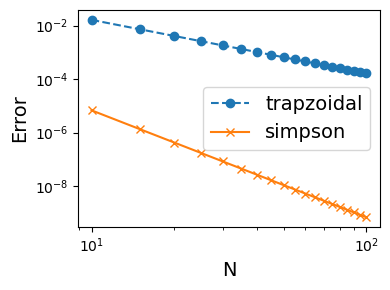

In [5]:
plt.figure(figsize=(4,3))
plt.plot(n_list, err_list_trap, 'o--', label="trapzoidal")
plt.plot(n_list, err_list_simpson, 'x-', label="simpson")
plt.legend(fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('N',fontsize=14)
plt.ylabel('Error',fontsize=14)
plt.tight_layout()

## 验证课本的对于复化梯形法的误差公式(4.2.15)

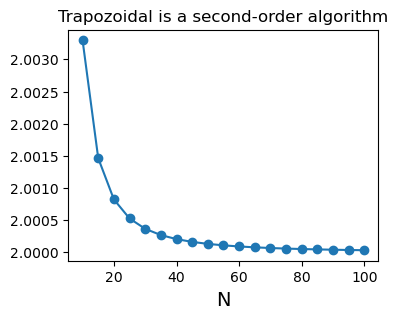

In [6]:
plt.figure(figsize=(4,3))
plt.plot(n_list, err_list_trap / (((b-a)/n_list)**2/12), 'o-')
plt.title('Trapozoidal is a second-order algorithm')
plt.xlabel('N',fontsize=14)
plt.show()

## 验证课本的对于复化Simpson的误差公式(4.2.16)

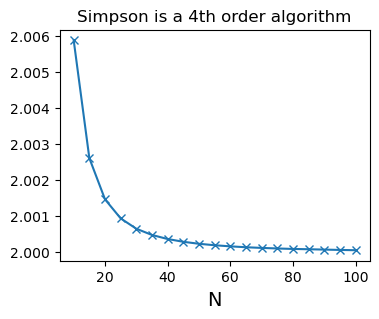

In [7]:
plt.figure(figsize=(4,3))
plt.plot(n_list, err_list_simpson / ((((b-a)/n_list)**4) / 180 / 2**4), 'x-')
plt.title('Simpson is a 4th order algorithm')
plt.xlabel('N',fontsize=14)
plt.show()

## Roomberg算法

In [8]:
def Roomberg(a, b, n, f):
    Ttable = np.zeros((n+1, n+1)) * np.nan
    for k in range(n+1):
        for m in range(k+1):
            if m == 0:
                Ttable[k,m] = trapezoidal(a, b, 2**k, f)
            else:
                alpha = 4**m
                Ttable[k,m] = alpha/(alpha-1)*Ttable[k,m-1] - 1/(alpha-1)*Ttable[k-1,m-1]
    return Ttable

In [9]:
f = lambda x : np.sin(x)
a = 0
b = np.pi
n = 6
Ttable = Roomberg(a, b, n, f)
pd.DataFrame(Ttable)

0         1         2         3    4    5    6
0  1.923671e-16       NaN       NaN       NaN  NaN  NaN  NaN
1  1.570796e+00  2.094395       NaN       NaN  NaN  NaN  NaN
2  1.896119e+00  2.004560  1.998571       NaN  NaN  NaN  NaN
3  1.974232e+00  2.000269  1.999983  2.000006  NaN  NaN  NaN
4  1.993570e+00  2.000017  2.000000  2.000000  2.0  NaN  NaN
5  1.998393e+00  2.000001  2.000000  2.000000  2.0  2.0  NaN
6  1.999598e+00  2.000000  2.000000  2.000000  2.0  2.0  2.0

In [10]:
pd.DataFrame(np.abs(Ttable-2.0)).map(lambda x: f"{x:.2e}")

0         1         2         3         4         5         6
0  2.00e+00       nan       nan       nan       nan       nan       nan
1  4.29e-01  9.44e-02       nan       nan       nan       nan       nan
2  1.04e-01  4.56e-03  1.43e-03       nan       nan       nan       nan
3  2.58e-02  2.69e-04  1.69e-05  5.55e-06       nan       nan       nan
4  6.43e-03  1.66e-05  2.48e-07  1.63e-08  5.41e-09       nan       nan
5  1.61e-03  1.03e-06  3.81e-09  5.97e-11  3.97e-12  1.32e-12       nan
6  4.02e-04  6.45e-08  5.93e-11  2.29e-13  4.00e-15  2.22e-16  6.66e-16

In [11]:
# 例子4.3的表格

def sinx_divide_x(x):
    if x < 1.0e-5:
        return 1
    else:
        return np.sin(x)/x
    
f = lambda x : sinx_divide_x(x)

a = 0
b = 1
n = 4

pd.DataFrame(Roomberg(a, b, n, f))

0         1         2         3         4
0  0.920735       NaN       NaN       NaN       NaN
1  0.939793  0.946146       NaN       NaN       NaN
2  0.944514  0.946087  0.946083       NaN       NaN
3  0.945691  0.946083  0.946083  0.946083       NaN
4  0.945985  0.946083  0.946083  0.946083  0.946083